# Imports

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [34]:
players_fc24 = pd.read_csv('./datasets/fc24/male_players.csv')

# Players dataset

In [35]:
players_fc24.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [36]:
columns = players_fc24.columns.tolist()

def print_columns_in_groups(column_list, group_size):
    for i in range(0, len(column_list), group_size):
        print(column_list[i:i+group_size])

print_columns_in_groups(columns, 7)

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name']
['player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob']
['height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level']
['club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name']
['nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation']
['work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace']
['shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing']
['attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing']
['skill_ball_control', 'movement_acceleration', 'movement_sprin

In [37]:
#We remove the players that are not active
players_fc24['club_contract_valid_until_year'].value_counts()
players_fc24 = players_fc24[players_fc24['club_contract_valid_until_year'] > 2023]
players_fc24['club_contract_valid_until_year'].value_counts()


club_contract_valid_until_year
2024.0    17419
2025.0     9279
2026.0     4576
2027.0     2118
2028.0      831
2029.0       19
2030.0        9
2031.0        6
2032.0        2
Name: count, dtype: int64

In [38]:
columns_of_interest = ['long_name', 'age', 'nationality_name','player_positions', 'nation_position',
                       'overall', 'potential', 'value_eur', 'wage_eur', 'club_name']
players_fc24 = players_fc24[columns_of_interest]
players_fc24.head(5)

,long_name,age,nationality_name,player_positions,nation_position,overall,potential,value_eur,wage_eur,club_name
0,Kylian Mbappé Lottin,24,France,"ST, LW",LW,91,94,181500000.0,230000.0,Paris Saint Germain
1,Erling Braut Haaland,22,Norway,ST,ST,91,94,185000000.0,340000.0,Manchester City
2,Kevin De Bruyne,32,Belgium,"CM, CAM",CAM,91,91,103000000.0,350000.0,Manchester City
3,Lionel Andrés Messi Cuccittini,36,Argentina,"CF, CAM",RW,90,90,41000000.0,23000.0,Inter Miami
4,Karim Benzema,35,France,"CF, ST",NaN,90,90,51000000.0,95000.0,Al Ittihad


In [39]:
players_fc24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34259 entries, 0 to 122622
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   long_name         34259 non-null  object 
 1   age               34259 non-null  int64  
 2   nationality_name  34259 non-null  object 
 3   player_positions  34259 non-null  object 
 4   nation_position   1845 non-null   object 
 5   overall           34259 non-null  int64  
 6   potential         34259 non-null  int64  
 7   value_eur         34252 non-null  float64
 8   wage_eur          34259 non-null  float64
 9   club_name         34259 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.9+ MB


# Data Preparation

In [40]:
america_cup_2024_countries = ['Argentina', 'Peru', 'Chile', 'Canada', 'Mexico', 
                              'Ecuador', 'Venezuela', 'Jamaica', 'United States', 
                              'Uruguay', 'Panama', 'Bolivia', 'Brazil', 'Colombia', 
                              'Costa Rica', 'Paraguay']

players_fc24 = players_fc24[(players_fc24["nationality_name"].apply(lambda x: x in america_cup_2024_countries))]
players_fc24.head(10)

,long_name,age,nationality_name,player_positions,nation_position,overall,potential,value_eur,wage_eur,club_name
3,Lionel Andrés Messi Cuccittini,36,Argentina,"CF, CAM",RW,90,90,41000000.0,23000.0,Inter Miami
8,Vinícius José Paixão de Oliveira Júnior,22,Brazil,LW,NaN,89,94,158500000.0,310000.0,Real Madrid
9,Alisson Ramsés Becker,30,Brazil,GK,NaN,89,90,77500000.0,180000.0,Liverpool
12,Neymar da Silva Santos Júnior,31,Brazil,LW,NaN,89,89,85500000.0,115000.0,Al Hilal
14,Carlos Henrique Venancio Casimiro,31,Brazil,CDM,NaN,89,89,72000000.0,240000.0,Manchester United
17,Federico Santiago Valverde Dipetta,24,Uruguay,"CM, RW",NaN,88,92,130500000.0,270000.0,Real Madrid
19,Ederson Santana de Moraes,29,Brazil,GK,NaN,88,89,70000000.0,210000.0,Manchester City
28,Lautaro Javier Martínez,25,Argentina,ST,SUB,87,90,107000000.0,150000.0,Inter
31,Marcos Aoás Corrêa,29,Brazil,CB,NaN,87,88,73500000.0,140000.0,Paris Saint Germain
40,Ronald Federico Araújo da Silva,24,Uruguay,"CB, RB",NaN,86,91,93000000.0,175000.0,FC Barcelona


In [41]:
#We will use the player_positions and nation_position columns to determine the position of the player
players_fc24['Position'] = players_fc24['player_positions'].str.split(",").str[0]

def determine_position(row):
    if pd.isnull(row['nation_position']) or row['nation_position'] == 'SUB':
        positions = row['player_positions'].split(",")
        return positions[1] if row['nation_position'] == 'SUB' and len(positions) > 1 else positions[0]
    else:
        return row['nation_position']

players_fc24['Position'] = players_fc24.apply(determine_position, axis=1)
players_fc24 = players_fc24.drop(['player_positions', 'nation_position'], axis=1)
players_fc24.head(25)

,long_name,age,nationality_name,overall,potential,value_eur,wage_eur,club_name,Position
3,Lionel Andrés Messi Cuccittini,36,Argentina,90,90,41000000.0,23000.0,Inter Miami,RW
8,Vinícius José Paixão de Oliveira Júnior,22,Brazil,89,94,158500000.0,310000.0,Real Madrid,LW
9,Alisson Ramsés Becker,30,Brazil,89,90,77500000.0,180000.0,Liverpool,GK
12,Neymar da Silva Santos Júnior,31,Brazil,89,89,85500000.0,115000.0,Al Hilal,LW
14,Carlos Henrique Venancio Casimiro,31,Brazil,89,89,72000000.0,240000.0,Manchester United,CDM
17,Federico Santiago Valverde Dipetta,24,Uruguay,88,92,130500000.0,270000.0,Real Madrid,CM
19,Ederson Santana de Moraes,29,Brazil,88,89,70000000.0,210000.0,Manchester City,GK
28,Lautaro Javier Martínez,25,Argentina,87,90,107000000.0,150000.0,Inter,ST
31,Marcos Aoás Corrêa,29,Brazil,87,88,73500000.0,140000.0,Paris Saint Germain,CB
40,Ronald Federico Araújo da Silva,24,Uruguay,86,91,93000000.0,175000.0,FC Barcelona,CB


In [42]:
players_fc24_sorted = players_fc24.sort_values(by=['long_name', 'age'], ascending=[True, False])
players_fc24_latest = players_fc24_sorted.drop_duplicates(subset='long_name', keep='first')
players_fc24 = players_fc24_latest
players_fc24 = players_fc24.sort_values(by='overall', ascending=False)
players_fc24.head(20)


,long_name,age,nationality_name,overall,potential,value_eur,wage_eur,club_name,Position
3,Lionel Andrés Messi Cuccittini,36,Argentina,90,90,41000000.0,23000.0,Inter Miami,RW
14,Carlos Henrique Venancio Casimiro,31,Brazil,89,89,72000000.0,240000.0,Manchester United,CDM
12,Neymar da Silva Santos Júnior,31,Brazil,89,89,85500000.0,115000.0,Al Hilal,LW
9,Alisson Ramsés Becker,30,Brazil,89,90,77500000.0,180000.0,Liverpool,GK
8,Vinícius José Paixão de Oliveira Júnior,22,Brazil,89,94,158500000.0,310000.0,Real Madrid,LW
19,Ederson Santana de Moraes,29,Brazil,88,89,70000000.0,210000.0,Manchester City,GK
17,Federico Santiago Valverde Dipetta,24,Uruguay,88,92,130500000.0,270000.0,Real Madrid,CM
28,Lautaro Javier Martínez,25,Argentina,87,90,107000000.0,150000.0,Inter,ST
31,Marcos Aoás Corrêa,29,Brazil,87,88,73500000.0,140000.0,Paris Saint Germain,CB
43,Éder Gabriel Militão,25,Brazil,86,89,80000000.0,210000.0,Real Madrid,CB


# Analysis

## TOP 20 Player overall

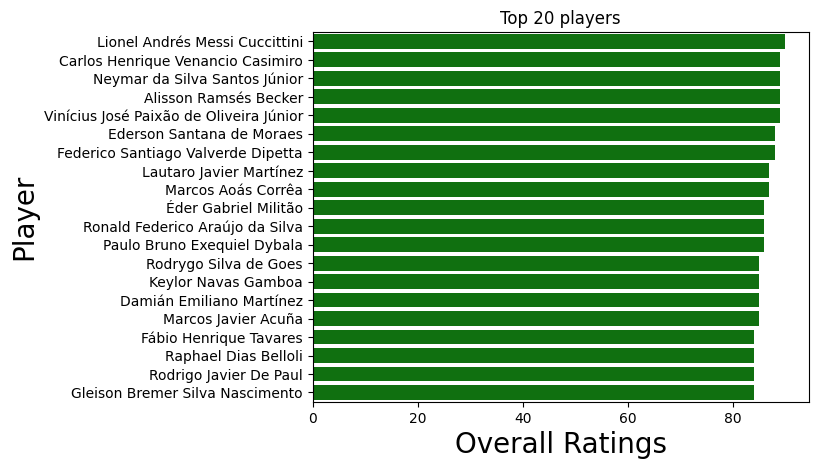

In [43]:
Overall = players_fc24["overall"]
footballer_name = players_fc24["long_name"]

x = players_fc24['long_name'].head(20) 
y = players_fc24['overall'].head(20)


ax= sns.barplot(x=y, y=x, color="green", orient='h')
plt.xlabel('Overall Ratings', size=20) 
plt.ylabel('Player', size=20) 
plt.title('Top 20 players')

plt.show()

## Best SQUAD

In [44]:
def get_best_squad(formation):
    players_fc24_copy = players_fc24.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            players_fc24_copy .loc[[players_fc24_copy [players_fc24_copy ['Position'] == i]['overall'].idxmax()]]['long_name'].to_string(index=False),
            players_fc24_copy [players_fc24_copy ['Position'] == i]['overall'].max(),
            players_fc24_copy .loc[[players_fc24_copy [players_fc24_copy ['Position'] == i]['overall'].idxmax()]]['age'].to_string(index=False),
            players_fc24_copy .loc[[players_fc24_copy [players_fc24_copy ['Position'] == i]['overall'].idxmax()]]['club_name'].to_string(index=False),
            players_fc24_copy .loc[[players_fc24_copy [players_fc24_copy ['Position'] == i]['overall'].idxmax()]]['value_eur'].to_string(index=False),
            players_fc24_copy .loc[[players_fc24_copy [players_fc24_copy ['Position'] == i]['overall'].idxmax()]]['wage_eur'].to_string(index=False)
        ])
        players_fc24_copy .drop(players_fc24_copy [players_fc24_copy ['Position'] == i]['overall'].idxmax(), 
                         inplace=True)
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'short_name', 'overall', 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

### Best 433

In [45]:
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position                         short_name overall age           club_name   value_eur wage_eur
      GK              Alisson Ramsés Becker      89  30           Liverpool  77500000.0 180000.0
      RB               Nahuel Molina Lucero      82  25     Atlético Madrid  39500000.0  59000.0
      CB                 Marcos Aoás Corrêa      87  29 Paris Saint Germain  73500000.0 140000.0
      CB               Éder Gabriel Militão      86  25         Real Madrid  80000000.0 210000.0
      LB                Marcos Javier Acuña      85  31             Sevilla  39000000.0  46000.0
     CDM  Carlos Henrique Venancio Casimiro      89  31   Manchester United  72000000.0 240000.0
      CM Federico Santiago Valverde Dipetta      88  24         Real Madrid 130500000.0 270000.0
     CAM      Ronaldo Jailson Cabrais Petri      83  31           Palmeiras  30000000.0  59000.0
      RW     Lionel Andrés Messi Cuccittini      90  36         Inter Miami  41000000.0  23000.0
      ST            Laut

### Best 442

In [46]:
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position                         short_name overall age           club_name   value_eur wage_eur
      GK              Alisson Ramsés Becker      89  30           Liverpool  77500000.0 180000.0
      RB               Nahuel Molina Lucero      82  25     Atlético Madrid  39500000.0  59000.0
      CB                 Marcos Aoás Corrêa      87  29 Paris Saint Germain  73500000.0 140000.0
      CB               Éder Gabriel Militão      86  25         Real Madrid  80000000.0 210000.0
      LB                Marcos Javier Acuña      85  31             Sevilla  39000000.0  46000.0
      RM    Malcom Filipe Silva de Oliveira      81  26            Al Hilal  30500000.0  52000.0
      CM Federico Santiago Valverde Dipetta      88  24         Real Madrid 130500000.0 270000.0
      CM    Bruno Guimarães Rodriguez Moura      84  25    Newcastle United  55500000.0 145000.0
      LM               Éverton Sousa Soares      80  25             Benfica  28000000.0  17000.0
      ST            Laut

### Best 4231

In [47]:
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position                        short_name overall age           club_name   value_eur wage_eur
      GK             Alisson Ramsés Becker      89  30           Liverpool  77500000.0 180000.0
      RB              Nahuel Molina Lucero      82  25     Atlético Madrid  39500000.0  59000.0
      CB                Marcos Aoás Corrêa      87  29 Paris Saint Germain  73500000.0 140000.0
      CB              Éder Gabriel Militão      86  25         Real Madrid  80000000.0 210000.0
      LB               Marcos Javier Acuña      85  31             Sevilla  39000000.0  46000.0
     CDM Carlos Henrique Venancio Casimiro      89  31   Manchester United  72000000.0 240000.0
     CDM            Fábio Henrique Tavares      84  29          Al Ittihad  36000000.0  65000.0
     CAM     Ronaldo Jailson Cabrais Petri      83  31           Palmeiras  30000000.0  59000.0
     CAM         Philippe Coutinho Correia      82  30         Aston Villa  29500000.0 100000.0
     CAM                Nailton 

## Top 10 Promising Teams
Function to find the best formation of each national team and its potential

In [48]:
def get_best_squad_n(formation, nationality, measurement = 'overall'):
    players_fc24_copy = players_fc24.copy()
    players_fc24_copy = players_fc24_copy[players_fc24_copy['nationality_name'] == nationality]
    store = []
    for i in formation:
        store.append([
            players_fc24_copy.loc[[players_fc24_copy[players_fc24_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            players_fc24_copy.loc[[players_fc24_copy[players_fc24_copy['Position'].str.contains(i)][measurement].idxmax()]]['long_name'].to_string(index = False), 
            players_fc24_copy[players_fc24_copy['Position'].str.contains(i)][measurement].max(),
            players_fc24_copy.loc[[players_fc24_copy[players_fc24_copy['Position'].str.contains(i)][measurement].idxmax()]]['age'].to_string(index = False),
            players_fc24_copy.loc[[players_fc24_copy[players_fc24_copy['Position'].str.contains(i)][measurement].idxmax()]]['club_name'].to_string(index = False),
            players_fc24_copy.loc[[players_fc24_copy[players_fc24_copy['Position'].str.contains(i)][measurement].idxmax()]]['value_eur'].to_string(index = False),
            players_fc24_copy.loc[[players_fc24_copy[players_fc24_copy['Position'].str.contains(i)][measurement].idxmax()]]['wage_eur'].to_string(index = False)
        ])    
        players_fc24_copy.drop(players_fc24_copy[players_fc24_copy['Position'].str.contains(i)][measurement].idxmax(),inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7),columns = ['Position', 'long_name', measurement, 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

In [49]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []
    for i in nationality_list:
        count = 0
        for j in squad_list:
            try:
                # for overall rating
                O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'overall')
                # for potential rating & corresponding value
                P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'potential')
                summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
                count += 1
            except:
                count += 1  
    return summary

In [50]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [51]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

In [52]:
country = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, america_cup_2024_countries)).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
country.set_index('nationality_name', inplace = False)
country[['overall', 'potential']] = country[['overall', 'potential']].astype(float)

In [53]:
miss = america_cup_2024_countries
miss = [item if item not in country.nationality_name.values else False for item in miss]
for item in miss:
    if(type(item) == str):
        print(item)

Panama
Costa Rica


In [57]:
panama_overall_mean = round(players_fc24[players_fc24['nationality_name'] == 'Panama'][['overall']].mean().tolist()[0], 2)
panama_potential_mean = round(players_fc24[players_fc24['nationality_name'] == 'Panama'][['potential']].mean().tolist()[0], 2)

costa_rica_overall_mean = round(players_fc24[players_fc24['nationality_name'] == 'Costa Rica'][['overall']].mean().tolist()[0], 2)
costa_rica_potential_mean = round(players_fc24[players_fc24['nationality_name'] == 'Costa Rica'][['potential']].mean().tolist()[0], 2)

print('Panama Overall Mean:', panama_overall_mean)
print('Panama Potential Mean:', panama_potential_mean)
print('Costa Rica Overall Mean:', costa_rica_overall_mean)
print('Costa Rica Potential Mean:', costa_rica_potential_mean)



Panama Overall Mean: 66.91
Panama Potential Mean: 70.09
Costa Rica Overall Mean: 67.38
Costa Rica Potential Mean: 70.86


In [58]:
Panama = pd.DataFrame({
    'nationality_name': 'Panama',
    'Squad': '4-4-2',
    'overall': panama_overall_mean,
    'potential': panama_potential_mean
}, index=[0])

Costa_Rica = pd.DataFrame({
    'nationality_name': 'Costa Rica',
    'Squad': '4-4-2',
    'overall': costa_rica_overall_mean,
    'potential': costa_rica_potential_mean
}, index=[0])

country = pd.concat([country, Panama, Costa_Rica], ignore_index=True)



country['overall'] = country["overall"].transform(lambda x: x.fillna(x.mean()))
country['potential'] = country["potential"].transform(lambda x: x.fillna(x.mean()))
country = country.drop(['Squad'],axis=1)
country = country.sort_values(['nationality_name','potential'],ascending=[True,False])
country_final = country.groupby('nationality_name').first().sort_values('potential', ascending=False)[0:16].reset_index() 


In [68]:
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

country_final = country_final.sort_values('overall', ascending=False)
country_final.to_csv('./datasets/created/country_final.csv',index=False)

In [61]:
country_top10 = country.groupby('nationality_name').first().sort_values('potential',ascending=False)[0:10].reset_index()
country_top10

,nationality_name,overall,potential
0,Brazil,85.27,87.82
1,Argentina,84.73,87.00
2,Uruguay,80.91,84.64
3,United States,76.91,82.64
4,Ecuador,75.82,81.73
5,Mexico,77.00,81.55
6,Colombia,78.64,81.27
7,Chile,75.73,80.27
8,Paraguay,74.91,79.27
9,Canada,74.55,79.09


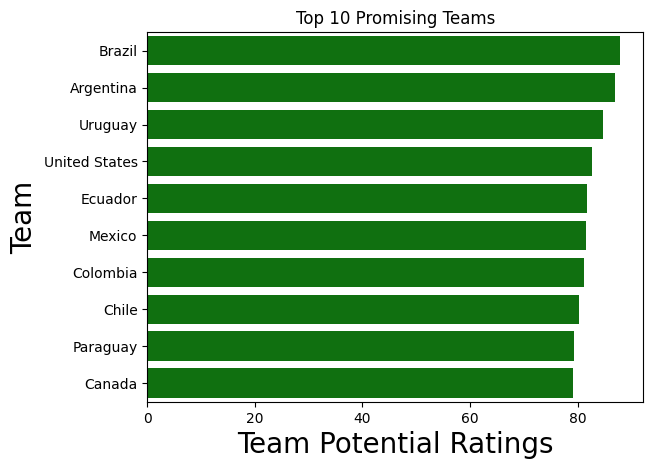

In [62]:
x = country_top10['nationality_name']
y = country_top10['potential']

ax= sns.barplot(x=y, y=x, color="green", orient='h')
plt.xlabel('Team Potential Ratings', size = 20) 
plt.ylabel('Team', size = 20 ) 
plt.title('Top 10 Promising Teams')

plt.show()

In [63]:
Uruguay = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Uruguay'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Uruguay.set_index('nationality_name', inplace = False)
Uruguay[['overall', 'potential']] = Uruguay[['overall', 'potential']].astype(float)
Uruguay

,nationality_name,Squad,overall,potential
0,Uruguay,3-4-3,80.73,84.27
1,Uruguay,4-4-2,80.36,83.91
2,Uruguay,4-3-1-2,80.91,84.64
3,Uruguay,4-3-3,80.82,84.45
4,Uruguay,4-2-3-1,80.00,84.18


In [64]:
rating_4312_UY_Overall, best_list_4312_UY_Overall = get_best_squad_n(squad_4312_strict, 'Uruguay', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_UY_Overall))
print(best_list_4312_UY_Overall)

-Overall-
Average rating: 80.9
Position                          long_name overall age         club_name   value_eur wage_eur
      GK      Néstor Fernando Muslera Micol      80  37       Galatasaray   2300000.0  24000.0
     RWB       Damián Nicolás Suárez Suárez      77  35            Getafe   3200000.0  19000.0
      CB    Ronald Federico Araújo da Silva      86  24      FC Barcelona  93000000.0 175000.0
      CB       José María Giménez de Vargas      83  28   Atlético Madrid  36500000.0  71000.0
      LB         Luis Alfonso Espino García      78  31    Rayo Vallecano  10000000.0  21000.0
      CM Federico Santiago Valverde Dipetta      88  24       Real Madrid 130500000.0 270000.0
      CM           Rodrigo Bentancur Colmán      82  26 Tottenham Hotspur  39500000.0 100000.0
     CDM           Lucas Torreira Di Pascua      82  27       Galatasaray  33000000.0  53000.0
     CAM  Mauricio Ernesto Pereyra Antonini      73  33      Orlando City   1900000.0   8000.0
      ST       Darw

In [29]:
Brazil = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Brazil'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Brazil.set_index('Nationality', inplace = False)
Brazil[['Overall', 'Potential']] = Brazil[['Overall', 'Potential']].astype(float)
Brazil

,Nationality,Squad,Overall,Potential
0,Brazil,3-4-3,85.27,87.82
1,Brazil,4-4-2,83.91,86.27
2,Brazil,4-3-1-2,84.45,86.27
3,Brazil,4-3-3,85.27,87.64
4,Brazil,4-2-3-1,85.18,87.64


In [30]:
rating_4312_BR_Overall, best_list_4312_BR_Overall = get_best_squad_n(squad_4312_strict, 'Brazil', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_BR_Overall))
print(best_list_4312_BR_Overall)

-Overall-
Average rating: 84.5
Position                           long_name overall age           club_name  value_eur wage_eur
      GK               Alisson Ramsés Becker      89  30           Liverpool 77500000.0 180000.0
      RB      Maikel Renan Catarino Fagundes      80  27         Corinthians 20500000.0  34000.0
      CB                  Marcos Aoás Corrêa      87  29 Paris Saint Germain 73500000.0 140000.0
      CB                Éder Gabriel Militão      86  25         Real Madrid 80000000.0 210000.0
     LWB         Adryan Juliano Zonta Torres      81  31          Bragantino 18500000.0  23000.0
     CDM   Carlos Henrique Venancio Casimiro      89  31   Manchester United 72000000.0 240000.0
     CDM              Fábio Henrique Tavares      84  29          Al Ittihad 36000000.0  65000.0
      CM     Bruno Guimarães Rodriguez Moura      84  25    Newcastle United 55500000.0 145000.0
     CAM       Ronaldo Jailson Cabrais Petri      83  31           Palmeiras 30000000.0  59000.0

In [31]:
Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Argentina.set_index('nationality_name', inplace = False)
Argentina[['overall', 'potential']] = Argentina[['overall', 'potential']].astype(float)
Argentina

,nationality_name,Squad,overall,potential
0,Argentina,3-4-3,84.36,86.82
1,Argentina,4-4-2,83.09,86.36
2,Argentina,4-3-1-2,83.55,86.36
3,Argentina,4-3-3,84.73,87.00
4,Argentina,4-2-3-1,84.73,86.91


In [32]:
rating_433_ARG_Overall, best_list_433_ARG_Overall = get_best_squad_n(squad_433_strict, 'Argentina', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Overall))
print(best_list_433_ARG_Overall)

rating_433_ARG_Potential, best_list_433_ARG_Potential = get_best_squad_n(squad_433_strict, 'Argentina', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Potential))
print(best_list_433_ARG_Potential)

-Overall-
Average rating: 84.7
Position                      long_name overall age         club_name   value_eur wage_eur
      GK       Damián Emiliano Martínez      85  30       Aston Villa  36000000.0 100000.0
      RB           Nahuel Molina Lucero      82  25   Atlético Madrid  39500000.0  59000.0
      CB              Lisandro Martínez      84  25 Manchester United  49500000.0 140000.0
     RCB        Cristian Gabriel Romero      82  25 Tottenham Hotspur  38000000.0  89000.0
      LB            Marcos Javier Acuña      85  31           Sevilla  39000000.0  46000.0
     RCM         Rodrigo Javier De Paul      84  29   Atlético Madrid  41000000.0  85000.0
     CAM    Paulo Bruno Exequiel Dybala      86  29              Roma  68000000.0 130000.0
     CDM                Guido Rodríguez      83  28        Real Betis  35000000.0  37000.0
      RW Lionel Andrés Messi Cuccittini      90  36       Inter Miami  41000000.0  23000.0
      ST        Lautaro Javier Martínez      87  25        